### Lucas Kanade Optical Flow Tracking 

Basically, it finds Shi-Tomashi features and track them using optical flow principals

In [6]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

In [17]:
dataset = '/home/alena/Documents/dark-slam/datasets/original/2022-03-10-12-54-53/'

def LKTracking(dataset_root, image_show=False, record_video=False, name="test"):
    dataset = dataset_root
    image_names = np.sort(os.listdir(dataset_root))
    first_image = os.path.join(dataset, image_names[0])

    # parameters for lucas kanade optical flow
    winSize = (9,9)
    maxLevel = 2
    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03)

    # parameters for ShiTomasi corner detection
    maxCorners, qualityLevel, minDistance, blockSize = [30, 0.3, 7, 7]
    
    # shi-tomashi detection zero-iteration
    oldFrame = cv2.imread(first_image)
    oldGray = cv2.cvtColor(oldFrame, cv2.COLOR_RGB2GRAY)
    p0 = cv2.goodFeaturesToTrack(oldGray, maxCorners, qualityLevel, minDistance, blockSize)

    # some empty inits
    p1 = np.empty(0)
    st = np.empty(0)
    err = np.empty(0)
    
    #mask for lines tracking
    mask = np.zeros_like(oldFrame)

    #colors creation
    color = [];
    for i in range(maxCorners):
        color.append((np.random.random()*255, np.random.random()*255, np.random.random()*255))
 
    #video recording
    if record_video:
        out = cv2.VideoWriter(f'{name}.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 10, (oldFrame.shape[1],oldFrame.shape[0]) )

    for image_name in tqdm(image_names[1:]):
        image_path = os.path.join(dataset, image_name)
        
        frame = cv2.imread(image_path)
        frameGray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # calculate optical flow
        p1, st, err = cv2.calcOpticalFlowPyrLK(oldGray, frameGray, p0, p1, st, err, winSize, maxLevel, criteria)

        # select good points
        goodNew = [];
        goodOld = [];
        for i in range(st.shape[0]):
            if st[i] == 1:
                goodNew.append((int(p1[i, 0, 0]), int(p1[i, 0, 1])))
                goodOld.append((int(p0[i, 0, 0]), int(p0[i, 0, 1])))

        # draw the points tracks
        for i in range(len(goodNew)):
            cv2.line(mask, goodNew[i], goodOld[i], color[i], 2)
            cv2.circle(frame, goodNew[i], 5, color[i], -1)

        frame = cv2.add(frame, mask)
        
        if record_video:
            out.write(frame)

        oldGray = frameGray.copy()
        p0 = p1.copy()

        if image_show:
            plt.subplots(figsize=(10, 10))
            plt.imshow(frame)
            plt.show()
    
    if record_video:
        out.release()
        cv2.waitKey(0)
        cv2.destroyAllWindows()

In [18]:
dataset = "/home/alena/Documents/dark-slam/datasets/original/2021-24-21-10-35/"
LKTracking(dataset, record_video=True, name="dark")

100%|██████████| 880/880 [00:07<00:00, 114.57it/s]


### Shi Tomashi exractor and BRIEF descriptor

In [32]:
def ShiTomashi(raw_img):
    
    # parameters for lucas kanade optical flow
    winSize = (9,9)
    maxLevel = 2
    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03)

    # parameters for ShiTomasi corner detection
    maxCorners, qualityLevel, minDistance, blockSize = [30, 0.3, 7, 7]
    
    gray = cv2.cvtColor(raw_img, cv2.COLOR_BGR2GRAY)
    corners = cv2.goodFeaturesToTrack(gray, maxCorners, qualityLevel, minDistance, blockSize)
    corners = np.int0(corners)
    return corners

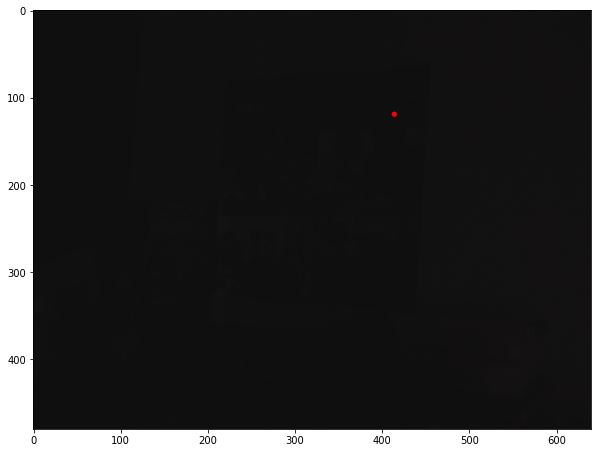

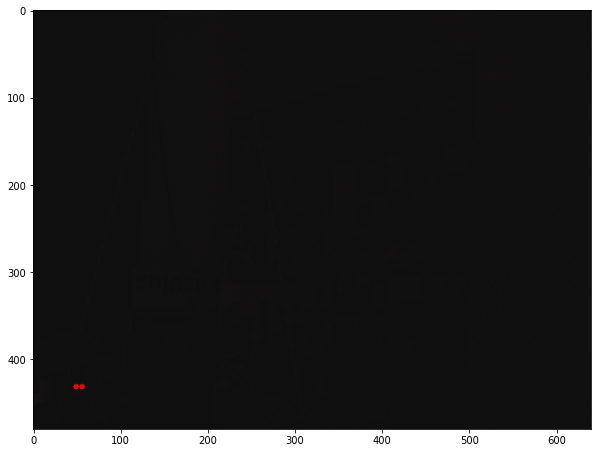

In [41]:
dataset = "/home/alena/Documents/dark-slam/datasets/original/2021-24-21-10-35/"


for i in range(0, 900, 50):
    img = cv2.imread(dataset + "%06i.png"%i)

    corners = ShiTomashi(img)
    for i in corners:
        x,y = i.ravel()
        cv2.circle(img,(x,y), 3, 255, -1)

    plt.subplots(figsize=(10,10))
    plt.imshow(img),plt.show()